In [50]:
#Load in the packages necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Download the file into the notebook
#Save the file as data
data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Advanced Data Science/Project 2/ecommerce_customer_data.csv')
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently
0,1,56,134,36,Female,10,Home & Kitchen,1
1,2,69,34,97,Female,13,Fashion,1
2,3,46,138,36,Male,19,Electronics,1
3,4,32,47,3,Male,11,Electronics,1
4,5,60,58,73,Male,13,Home & Kitchen,0
...,...,...,...,...,...,...,...,...
995,996,60,87,30,Male,12,Home & Kitchen,0
996,997,64,121,12,Female,17,Home & Kitchen,1
997,998,62,61,35,Female,5,Electronics,0
998,999,35,51,11,Male,9,Electronics,0


You can observe that there are 1000 entries of customers with 8 different parameters. The customerID (primary key) is their number count in the database, so the index can be set to CustomerID. 

In [52]:
#Turn the data into a dataframe
df = pd.DataFrame(data)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently
0,1,56,134,36,Female,10,Home & Kitchen,1
1,2,69,34,97,Female,13,Fashion,1
2,3,46,138,36,Male,19,Electronics,1
3,4,32,47,3,Male,11,Electronics,1
4,5,60,58,73,Male,13,Home & Kitchen,0
...,...,...,...,...,...,...,...,...
995,996,60,87,30,Male,12,Home & Kitchen,0
996,997,64,121,12,Female,17,Home & Kitchen,1
997,998,62,61,35,Female,5,Electronics,0
998,999,35,51,11,Male,9,Electronics,0


In [53]:
#Create an index for the dataframe listed as 'CustomerID' 
#Remove the customerID column so that there is no redundant data 
df.set_index(df['CustomerID'],inplace=True)
df.drop(columns='CustomerID',inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently
CustomerID,,,,,,,
1,56,134,36,Female,10,Home & Kitchen,1
2,69,34,97,Female,13,Fashion,1
3,46,138,36,Male,19,Electronics,1
4,32,47,3,Male,11,Electronics,1
5,60,58,73,Male,13,Home & Kitchen,0
...,...,...,...,...,...,...,...
996,60,87,30,Male,12,Home & Kitchen,0
997,64,121,12,Female,17,Home & Kitchen,1
998,62,61,35,Female,5,Electronics,0


The original E-Commerce data has been converted into a dataframe called df. The dataframe has the index set as customerID. The next step component of preprocessing the data is to check for duplicate or missing values of data. This can be done using built in functions within python

In [54]:
#Check for any N/A values
#Sum the number of NA values so that you can get an overall understanding
df.isna().sum()

Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
Gender                     0
Total Purchases            0
Category Most Purchased    0
Purchased Recently         0
dtype: int64

In [55]:
#Check for any null values
#Sum the number of null values so that you can get an overall understanding
df.isnull().sum()

Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
Gender                     0
Total Purchases            0
Category Most Purchased    0
Purchased Recently         0
dtype: int64

In [56]:
#Check for any duplicated entries
df.duplicated().sum()

0

The NA, null and duplicate values all returned as 0. This means that the data is all present and is ready to be analysed.

## 1. Getting to Know Your Customers

- Begin by familiarizing yourself with the customer dataset. What does a typical customer profile look like? Are there any interesting patterns or trends in their purchasing behavior?

- Consider the diversity of your customer base. How do customers differ in terms of their spending habits, product preferences, and demographic characteristics?

One of the best way to get to know your customer base is to create some visualisations of the data spread and other basic statistics. Understanding that there are different types of parameters of the customer base is also important.

The following parameters describe the customer: Age, Annual Income and Gender
The following parameters describe the purchasing information: Spending Score, Total Purchases, Category Most Purchased and Purchased Recently

Creating a difference in the type of parameters can create the opportunity for more insightful information to be drawn out from the data. 

In [57]:
#The first customer description parameter that will be looked at is age
#Use the unique function to have a look at all of the different number counts of different ages
df['Age'].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63])

In [58]:
#Those are a lot of different ages
#To fix this create different bins with different ages so that you can better understand the spread of ages
bins_age = [18,30,40,50,60,70]
labels_age = ['18-29','30-39','40-49','50-59','60-69']

#Use the pandas.cut function to create bin values based on discrete intervals
df_age_counts = pd.cut(df['Age'],bins=bins_age, labels=labels_age, right=True)
df_age_counts

CustomerID
1       50-59
2       60-69
3       40-49
4       30-39
5       50-59
        ...  
996     50-59
997     60-69
998     60-69
999     30-39
1000    50-59
Name: Age, Length: 1000, dtype: category
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69']

The series column Age now has a value that corresponds with the discrete interval of its value. The next step is to create a count of these intervals. Once you have a count of the different age intervals, you are able to create visualisations as it becomes a count

In [59]:
#With the new series you use the value_counts function to get a number that reflects the number of times a value falls within that interval
#The distinction of ages can help categorise a potential type of consumer
age_counts = df_age_counts.value_counts()
age_counts

40-49    218
18-29    214
60-69    183
30-39    181
50-59    180
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Distribution of Age within Customer Database'}, xlabel='Age Group', ylabel='Frequency'>

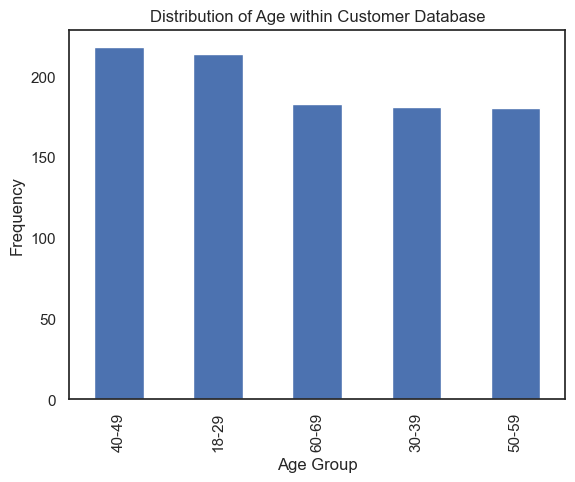

In [60]:
#Visualise the age brackets within the customer base to understand the spread of ages of consumers within database
age_counts.plot(kind='bar', xlabel = 'Age Group',ylabel = 'Frequency', title='Distribution of Age within Customer Database')

You can quickly observe that the age distribution is spread out quite equally. You can see the specific values in the age range table above. With the most frequent being 40-49 which has 218 customers and the the lowest being 50-59 with 180 which is a small difference, further proving that the spread of age within the database is not very high

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


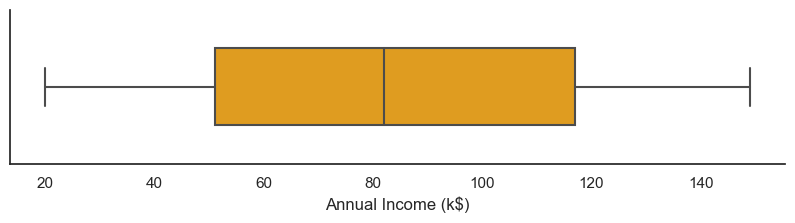

In [61]:
#The next parameter that describes the type of customers is Annual Income
#Create a box plot of annual income to understand the type of money that is being made by the customer base

sns.set(style='white')
fig,ax=plt.subplots(figsize=(10,2))

sns.boxplot(df['Annual Income (k$)'], color = 'orange', width = .5)

sns.despine()

From first observations it is clear that the spread of Annual Income is symmetrical as the difference in length of each quartile is relatively the same. This means that the customer base does not have a higher or lower concentration in income earners. Therefore there is no typical customer Annual Income

In [62]:
#To further understand the spread of annual income, use the describe function
df['Annual Income (k$)'].describe()

count    1000.000000
mean       83.095000
std        37.910621
min        20.000000
25%        51.000000
50%        82.000000
75%       117.000000
max       149.000000
Name: Annual Income (k$), dtype: float64

In [63]:
#We can reuse the same idea from age to create income brackets of the customer base to display this
bins_income = [20,40,60,80,100,120,140]
labels_income = ['20-39k','40-59k','60-79k','80-99k','100-119k','120-139k']

#Use the pandas.cut function to create bin values based on discrete intervals
df_income_counts = pd.cut(df['Annual Income (k$)'],bins=bins_income, labels=labels_income, right=True)
df_income_counts

CustomerID
1       120-139k
2         20-39k
3       120-139k
4         40-59k
5         40-59k
          ...   
996       80-99k
997     120-139k
998       60-79k
999       40-59k
1000    120-139k
Name: Annual Income (k$), Length: 1000, dtype: category
Categories (6, object): ['20-39k' < '40-59k' < '60-79k' < '80-99k' < '100-119k' < '120-139k']

<AxesSubplot:>

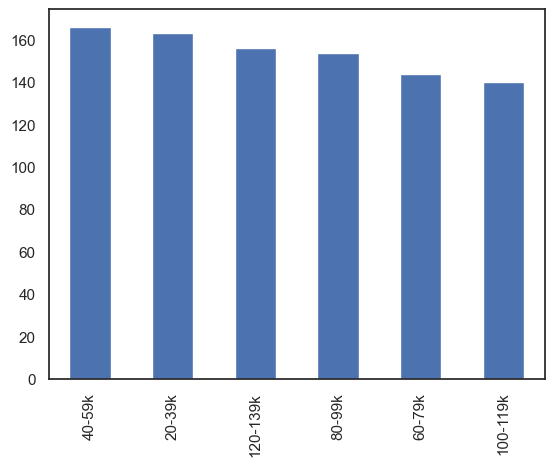

In [64]:
#Now create a count of the different income ranges
income_counts = df_income_counts.value_counts()
income_counts.plot(kind='bar')

The bar graph displays a similar story to the box plot. There is a pretty small difference between the frequency of lower income earners and higher income earners. This suggests that there is no typical amount of income for the users in the customer database

In [65]:
#The last description parameter of those in the database is gender
#Get a count of the different genders
df['Gender'].value_counts()

Male      523
Female    477
Name: Gender, dtype: int64

The next metric to look at is male or female. this can be represented by doing a simple value cofunt as it is spread, however a pie chart may be useful to visualise the spread of male/female. In order to do this, create a numerical count of the split of gender

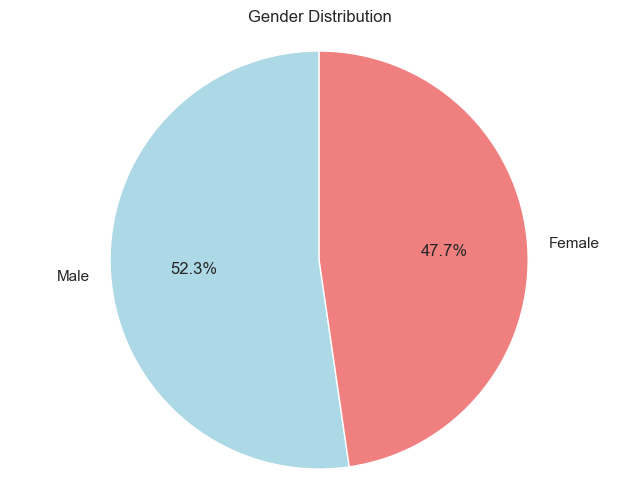

In [66]:
#Create a variable that represents the spread of gender
gender_counts = df['Gender'].value_counts()

#Plot the pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The pie graph creates a visualise that allows us to understand the spread of gender. Using a pie chart with two options does create a very clear image that the spread is equal.

The next step is to understand the spending habits of the database. Does the customer database tend towards making certain purchases. The following parameters will be explored.
- Spending Score
- Total Purchases
- Category Most Purchased
- Purchased Recently

In [67]:
#Let's first observe category most purchased as this is a very important variable to observe
#Category most purchased looks like a very important categorical variable to observe
df['Category Most Purchased'].unique()

array(['Home & Kitchen', 'Fashion', 'Electronics'], dtype=object)

In [68]:
#Create a value count within the data and display it
df['Category Most Purchased Numerical']=df['Category Most Purchased'].map({'Home & Kitchen':1, 'Fashion':2,'Electronics':3})
print('Home & Kitchen: ',df['Category Most Purchased Numerical'].value_counts()[1])
print('Fashion: ',df['Category Most Purchased Numerical'].value_counts()[2])
print('Electronics: ',df['Category Most Purchased Numerical'].value_counts()[3])

Home & Kitchen:  345
Fashion:  333
Electronics:  322


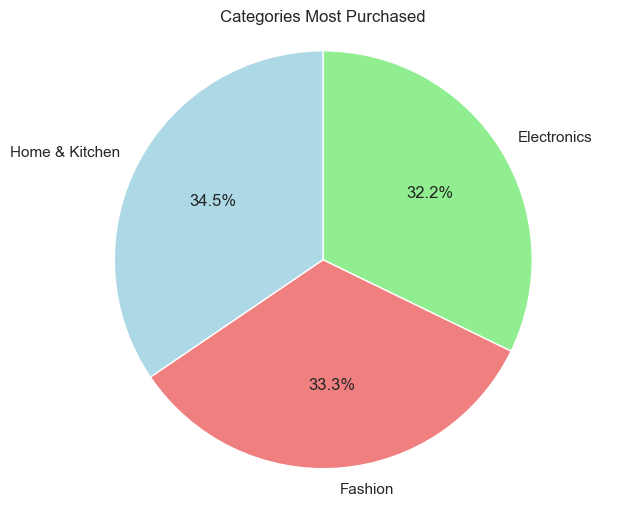

In [69]:
#Create a variable that represents the spread of gender
category_counts = df['Category Most Purchased Numerical'].value_counts()
labels = ['Home & Kitchen','Fashion','Electronics']

#Plot the pie chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'],labels=labels)
plt.title('Categories Most Purchased')
plt.ylabel('')
plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

There are only three types of Category Most Purchased, 'Home & Kitchen', 'Fashion' and 'Electronics'. Each one of these have around a third of the total customer base. This does not suggest that there are any particular purchasing types of the customers.

<AxesSubplot:title={'center':'Number of Purchases Made Per Customer'}, ylabel='Frequency'>

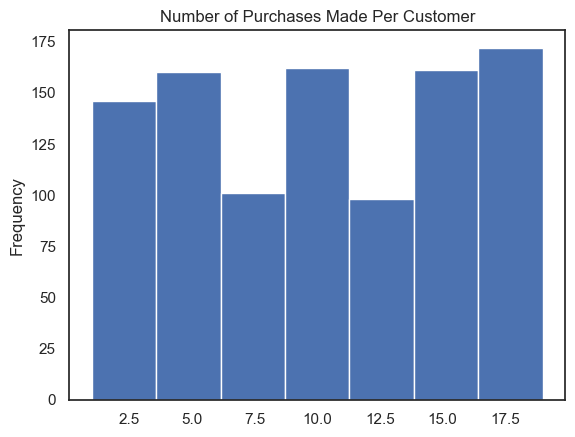

In [70]:
#The next important parameter is to look at the number of purchase that were made by each customer
#Create a bar chart of the number of purchases that were made by each customer
df['Total Purchases'].plot(kind='hist',bins=7,title='Number of Purchases Made Per Customer')

When creating the histogram of number of purchases made by each customer, the spread will change dependent on the number of bins that are used. However, for the most part it continues to follow a symmetrical spread of the data. When 7 bins are used as seen above, there are two lower frequency brackets of between 7.5-10 and 12.5-15 which represents that there are a less number of people making that number of purchases. However this does not suggest that there is any particular spread. If there was a higher frequency of purchases in the middle (7.5-12.5) this would suggest a normal distribution, but it does not. This type of spread is relatively symmetrical

<AxesSubplot:xlabel='Spending Score (1-100)'>

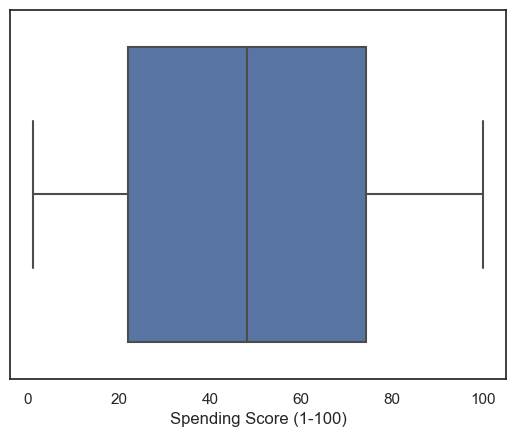

In [71]:
#The last paramter to look at is Spending Score, this is a discrete value between 1 and 100
#Create a simple boxplot of the spending score of the customers
sns.boxplot(x=df['Spending Score (1-100)'])

From looking at all of the parameters, there are no clear patterns. This means that the diversity of the customer base spreads equally. This was demonstrated by using different visualisation techniques, each one serving their own advantages. However, the overall contention was that this customer database does not tend towards any particular type of customer nor a particular type of purchasing behaviour.

## 2. Crafting Customer Personas
- Can you identify distinct types of customers within your data? Think about how you might group customers to better understand their needs and preferences.
- For each customer group you identify, create a detailed persona. What are their key characteristics, and how might these influence their purchasing decisions?

From the previous section there was no typical customer characteristics nor types of purchases. However, it may be possible to find clustering amongst the data which would show that particular types of values are grouped together. For example, you might expect that higher income earners are going to have a higher spending score. To try and split up the data, create categorical variables based on the Annual Income and then try to find patterns in that data

A part of the original data frame, create categorical variables for income
- Earning less than 60k is poor
- Earning in between 60k and 120k is average
- Earning above 120k is rich

In [72]:
#Create income bins for earners
income_bins = [0,60,120,float('inf')]
#Create different labels for the bin values
income_labels = ['Poor', 'Average', 'Rich']

#Add a new column to the category using the .cut() method
df['Income Category'] = pd.cut(df['Annual Income (k$)'],bins = income_bins,labels=income_labels, right=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently,Category Most Purchased Numerical,Income Category
CustomerID,,,,,,,,,
1,56,134,36,Female,10,Home & Kitchen,1,1,Rich
2,69,34,97,Female,13,Fashion,1,2,Poor
3,46,138,36,Male,19,Electronics,1,3,Rich
4,32,47,3,Male,11,Electronics,1,3,Poor
5,60,58,73,Male,13,Home & Kitchen,0,1,Poor
...,...,...,...,...,...,...,...,...,...
996,60,87,30,Male,12,Home & Kitchen,0,1,Average
997,64,121,12,Female,17,Home & Kitchen,1,1,Rich
998,62,61,35,Female,5,Electronics,0,3,Average


In [73]:
df.groupby('Income Category')['Spending Score (1-100)'].mean()

Income Category
Poor       47.461765
Average    49.390411
Rich       49.815315
Name: Spending Score (1-100), dtype: float64

Following creating the different categories and testing if they influence the spending score values, it does not suggest any relationship. The next step is to look at the different genders to see if there are more or less males or females based on thier income

In [74]:
# Group the data by 'Income Category' and 'Gender', and calculate the count for each group
gender_counts_by_income = df.groupby(['Income Category', 'Gender']).size().unstack()

# Fill missing values (if any) with zeros
gender_counts_by_income = gender_counts_by_income.fillna(0)

# Rename the index (Income Category) for better clarity
gender_counts_by_income.index.names = ['Income Category']

# Display the result
print(gender_counts_by_income)

Gender           Female  Male
Income Category              
Poor                165   175
Average             195   243
Rich                117   105


There does seem to be a few more average income earners for males compared to females, however relatively it is not enough of a difference to state that the customer base has males earning more of an average income compared to females. 

Since it has been difficult to find any patterns, the next step is to do a clustering method which can help find patterns that may be harder to find using the techniques that I have shown. I am going to be using the data mining and visualisation tool Orange to try and find any clustering. Look at the image folders to see clustering

There has been no real clustering that has been observed from using Orange. As a result I am going to create what would be typical customers to try and find any patterns amongst the data using that technique

### Customer Type 1 - Young, Rich/Poor, Male/Female

I am going to create different profiles, these will all have their age in the category as young

- Young (age<=25), rich (income>=120), male
- Young (age<=25), rich (income>=120), female
- Young (age<=25), poor (income>=60), male
- Young (age<=25), poor (income>=60), female

In [75]:
#Create the different categories of consumers

#Young, rich, male category
young_rich_male_df = df[(df['Age'] <= 25) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Male')]

#Young, rich, female
young_rich_female_df = df[(df['Age'] <= 25) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Female')]

#Young, poor, male
young_poor_male_df = df[(df['Age'] <= 25) & (df['Annual Income (k$)'] < 60) & (df['Gender'] == 'Male')]

#Young, poor, female
young_poor_female_df = df[(df['Age'] <= 25) & (df['Annual Income (k$)'] < 60) & (df['Gender'] == 'Female')]


In [76]:
#Print out the number of people that belong in each of the categories
print('young, rich, male: ',young_rich_male_df.count()[0])
print('young, rich, female: ',young_rich_female_df.count()[0])
print('young, poor, male: ',young_poor_male_df.count()[0])
print('young, poor, female: ',young_poor_female_df.count()[0])


young, rich, male:  16
young, rich, female:  21
young, poor, male:  15
young, poor, female:  26


You can see that there are a few more rich young females compared to males. But there are far more poor young females compared to young poor males. That suggests a little bit about the type of customers that might exist. Now that you have your different categories, you want to decide upon the metric to observe. If we are trying to understand their needs and preferences, creating a pie chart of each of their category of most purchased items would be a good way to observe their spending patterns

In [77]:
#Create the value counts for each category for each customer type
young_rich_male_category_count = young_rich_male_df['Category Most Purchased Numerical'].value_counts()
young_rich_female_category_count = young_rich_female_df['Category Most Purchased Numerical'].value_counts()
young_poor_male_category_count = young_poor_male_df['Category Most Purchased Numerical'].value_counts()
young_poor_female_category_count = young_poor_female_df['Category Most Purchased Numerical'].value_counts()

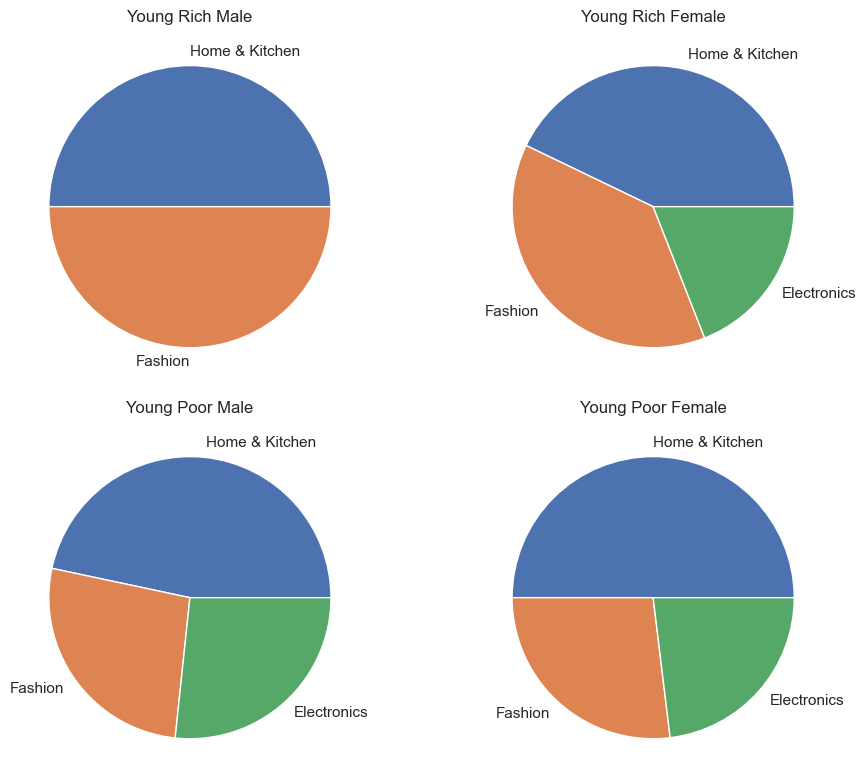

In [78]:
#Create the labels for the pie chart
labels_customer = ['Young Rich Male', 'Young Rich Female','Young Poor Male', 'Young Poor Female']
fig,axs = plt.subplots(2,2, figsize = (10,8))

labels_category = ['Home & Kitchen', 'Fashion', 'Electronics']

# Plot box plots for each category
young_rich_male_category_count.plot(ax=axs[0, 0], kind='pie', title=labels_customer[0], labels=labels_category, ylabel='')
young_rich_female_category_count.plot(ax=axs[0, 1], kind='pie', title=labels_customer[1],labels=labels_category,ylabel='')
young_poor_male_category_count.plot(ax=axs[1, 0], kind='pie', title=labels_customer[2],labels=labels_category,ylabel='')
young_poor_female_category_count.plot(ax=axs[1, 1], kind='pie', title=labels_customer[3],labels=labels_category,ylabel='')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

From the visual that has been created, there are some patterns. For Young Rich Men there was no top purchases of electronics and it was equally spread between Home & Kitchen and Fashion. This can definitely be used for advertisement in understanding that young rich men in the current customer base are likely not going to be purchasing electronics as much. Another observation is that home & kitchen is something that dominated amonst all the young indidivudals, that is something to be considered when understanding the needs of the younger customer base (under 25)

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/595904854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_rich_male_df['Category'] = 'Young, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/595904854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_rich_female_df['Category'] = 'Young, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/595904854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

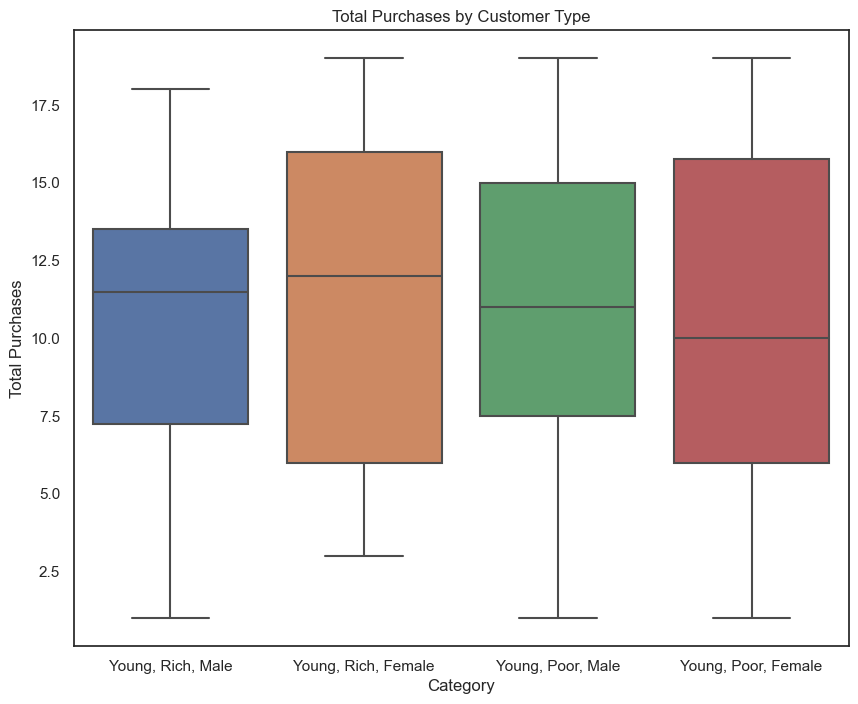

In [79]:
# Concatenate dataframes
young_rich_male_df['Category'] = 'Young, Rich, Male'
young_rich_female_df['Category'] = 'Young, Rich, Female'
young_poor_male_df['Category'] = 'Young, Poor, Male'
young_poor_female_df['Category'] = 'Young, Poor, Female'

combined_df = pd.concat([young_rich_male_df, young_rich_female_df, young_poor_male_df, young_poor_female_df])

# Create box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Category', y='Total Purchases', data=combined_df)
plt.title('Total Purchases by Customer Type')
plt.show()


Total Purchases per Customer Type displays some changes based on the customer type. Young Rich Females had the highest median and the lowest minimum but also had a wider spread of data. Where as young rich males had a smalller spread of data. OVerall from the table it is hard to draw any major conclusions.

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1747747336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_rich_male_df['Group'] = 'Young, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1747747336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_rich_female_df['Group'] = 'Young, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1747747336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

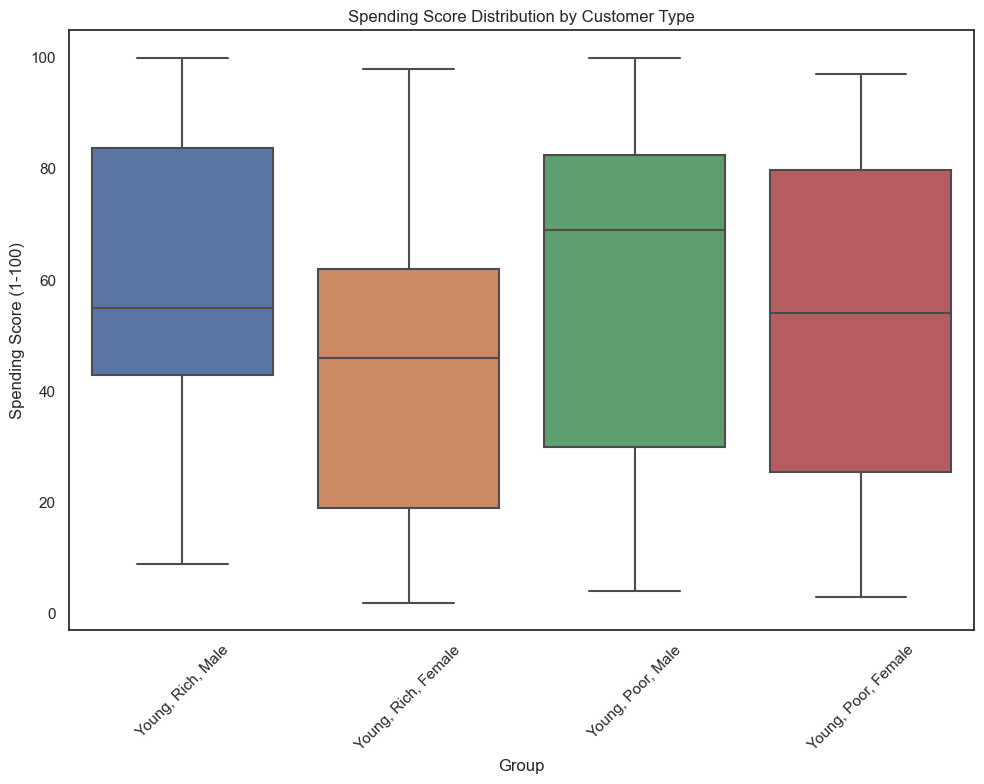

In [80]:
import seaborn as sns
import pandas as pd

# Combine dataframes and add a 'Group' column to differentiate between groups
young_rich_male_df['Group'] = 'Young, Rich, Male'
young_rich_female_df['Group'] = 'Young, Rich, Female'
young_poor_male_df['Group'] = 'Young, Poor, Male'
young_poor_female_df['Group'] = 'Young, Poor, Female'

# Concatenate the dataframes
combined_df = pd.concat([young_rich_male_df, young_rich_female_df, young_poor_male_df, young_poor_female_df])

# Plot box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=combined_df, x='Group', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Customer Type')
plt.xlabel('Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


The spending score distribution does represent some data, Young Rich Females had a lower median Spending Score with the top of its upper quartile falling much lower than the other categories. This suggests that Young Rich Females are not the ideal people to be advertising towards as they may be less likely to spend more. Where as the median for Young Poor Males was much higher than the others.

### Customer Type 2 - Middle Aged Rich/Poor, Male/Female

In [81]:
#Create the different categories of consumers

#Middle aged, rich, male category
middle_rich_male_df = df[(df['Age'] > 35) & (df['Age'] <= 60) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Male')]

#Middle aged, rich, female
middle_rich_female_df = df[(df['Age'] > 35) & (df['Age'] <= 60) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Female')]

#Middle aged, poor, male
middle_poor_male_df = df[(df['Age'] > 35) & (df['Age'] <= 60) & (df['Annual Income (k$)'] <60) & (df['Gender'] == 'Male')]

#Middle aged, poor, female
middle_poor_female_df = df[(df['Age'] > 35) & (df['Age'] <= 60) & (df['Annual Income (k$)'] <60) & (df['Gender'] == 'Female')]

In [82]:
print('Middle-aged rich male: ',middle_rich_male_df.count()[0])
print('Middle-aged rich female: ',middle_rich_female_df.count()[0])
print('Middle-aged poor male: ',middle_poor_male_df.count()[0])
print('Middle-aged poor female: ',middle_poor_female_df.count()[0])

Middle-aged rich male:  44
Middle-aged rich female:  57
Middle-aged poor male:  85
Middle-aged poor female:  87


There seems to be more poor middle aged people then rich middle aged peope. Where as the gender does not make a difference. In the previous category of people it seemed that there was differences in the most popular category purchased. I am going to explore this using pie charts as done before as they represent the data well.

In [83]:
#Create the value counts for each category for each customer type
middle_male_category_count = middle_rich_male_df['Category Most Purchased Numerical'].value_counts()
middle_rich_female_category_count = middle_rich_female_df['Category Most Purchased Numerical'].value_counts()
middle_poor_male_category_count = middle_poor_male_df['Category Most Purchased Numerical'].value_counts()
middle_poor_female_category_count = middle_poor_female_df['Category Most Purchased Numerical'].value_counts()

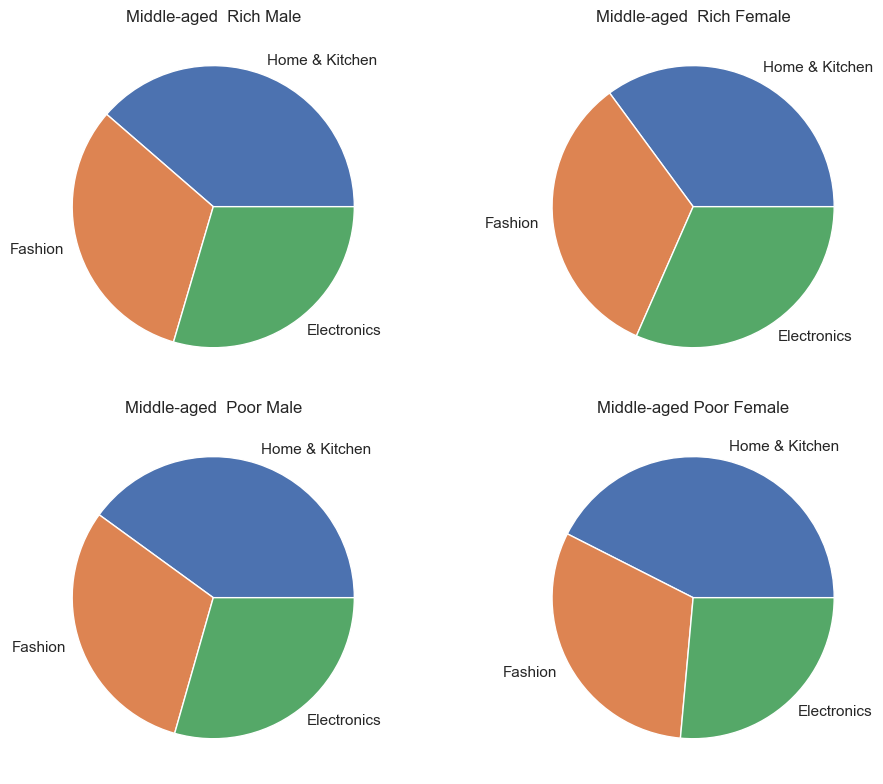

In [84]:
#Create the labels for the pie chart
labels_customer = ['Middle-aged  Rich Male', 'Middle-aged  Rich Female','Middle-aged  Poor Male', 'Middle-aged Poor Female']
fig,axs = plt.subplots(2,2, figsize = (10,8))

labels_category = ['Home & Kitchen', 'Fashion', 'Electronics']

# Plot box plots for each category
middle_male_category_count.plot(ax=axs[0, 0], kind='pie', title=labels_customer[0], labels=labels_category, ylabel='')
middle_rich_female_category_count.plot(ax=axs[0, 1], kind='pie', title=labels_customer[1],labels=labels_category,ylabel='')
middle_poor_male_category_count.plot(ax=axs[1, 0], kind='pie', title=labels_customer[2],labels=labels_category,ylabel='')
middle_poor_female_category_count.plot(ax=axs[1, 1], kind='pie', title=labels_customer[3],labels=labels_category,ylabel='')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1807765250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_rich_male_df['Group'] = 'Old, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1807765250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_rich_female_df['Group'] = 'Old, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/1807765250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

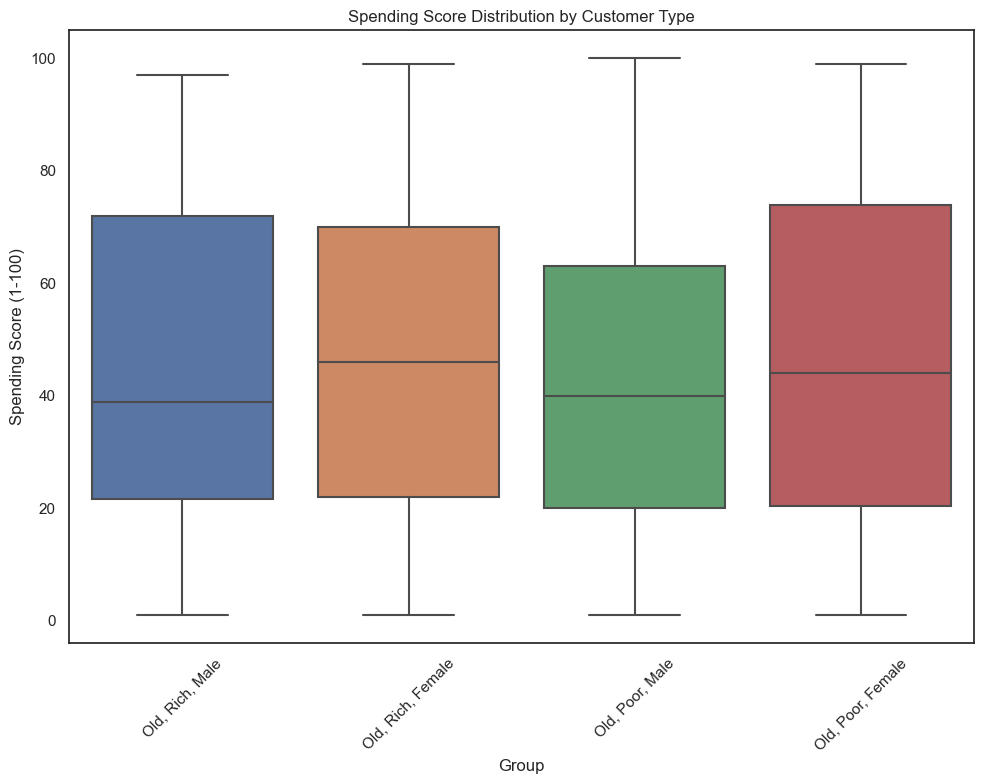

In [85]:
import seaborn as sns
import pandas as pd

# Combine dataframes and add a 'Group' column to differentiate between groups
middle_rich_male_df['Group'] = 'Old, Rich, Male'
middle_rich_female_df['Group'] = 'Old, Rich, Female'
middle_poor_male_df['Group'] = 'Old, Poor, Male'
middle_poor_female_df['Group'] = 'Old, Poor, Female'

# Concatenate the dataframes
combined_df = pd.concat([middle_rich_male_df, middle_rich_female_df, middle_poor_male_df, middle_poor_female_df])

# Plot box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=combined_df, x='Group', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Customer Type')
plt.xlabel('Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


This data does not represent anything insightful. You can see that the data is spread equally.

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/654496460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_rich_male_df['Category'] = 'Middle, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/654496460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_rich_female_df['Category'] = 'Middle, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/654496460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

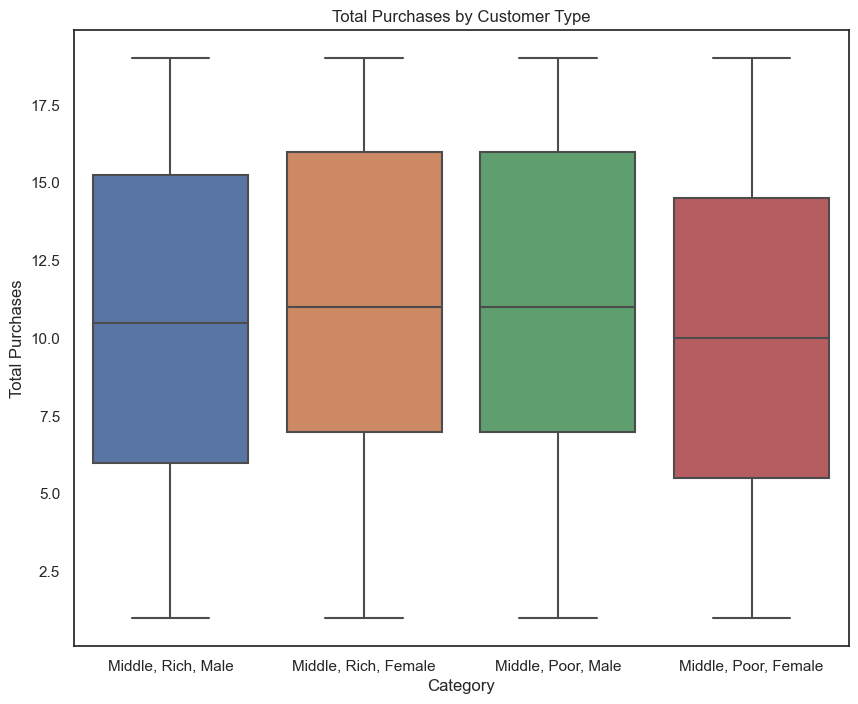

In [86]:
# Concatenate dataframes
middle_rich_male_df['Category'] = 'Middle, Rich, Male'
middle_rich_female_df['Category'] = 'Middle, Rich, Female'
middle_poor_male_df['Category'] = 'Middle, Poor, Male'
middle_poor_female_df['Category'] = 'Middle, Poor, Female'

combined_df = pd.concat([middle_rich_male_df, middle_rich_female_df, middle_poor_male_df, middle_poor_female_df])

# Create box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Category', y='Total Purchases', data=combined_df)
plt.title('Total Purchases by Customer Type')
plt.show()


It seems that the middle aged people tend to have very similar purchase numbers and types of purchases that are made. The next step is to look at the next category of people.

### Customer type 3 - Old, Rich/Poor, Male/Female

In [87]:
#Create the different categories of consumers

#Old, rich, male category
old_rich_male_df = df[(df['Age'] > 60) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Male')]

#Old, rich, female
old_rich_female_df = df[(df['Age'] > 60) & (df['Annual Income (k$)'] >= 120) & (df['Gender'] == 'Female')]

#Old, poor, male
old_poor_male_df = df[(df['Age'] >60) & (df['Annual Income (k$)'] < 60) & (df['Gender'] == 'Male')]

#Old, poor, female
old_poor_female_df = df[(df['Age'] >60) & (df['Annual Income (k$)'] < 60) & (df['Gender'] == 'Female')]


In [88]:
print('Old rich male: ',old_rich_male_df.count()[0])
print('Old rich female: ',old_rich_female_df.count()[0])
print('Old poor male: ',old_poor_male_df.count()[0])
print('Old poor female: ',old_poor_female_df.count()[0])

Old rich male:  24
Old rich female:  22
Old poor male:  37
Old poor female:  26


In [89]:
#Create the value counts for each category for each customer type
old_male_category_count = old_rich_male_df['Category Most Purchased Numerical'].value_counts()
old_rich_female_category_count = old_rich_female_df['Category Most Purchased Numerical'].value_counts()
old_poor_male_category_count = old_poor_male_df['Category Most Purchased Numerical'].value_counts()
old_poor_female_category_count = old_poor_female_df['Category Most Purchased Numerical'].value_counts()

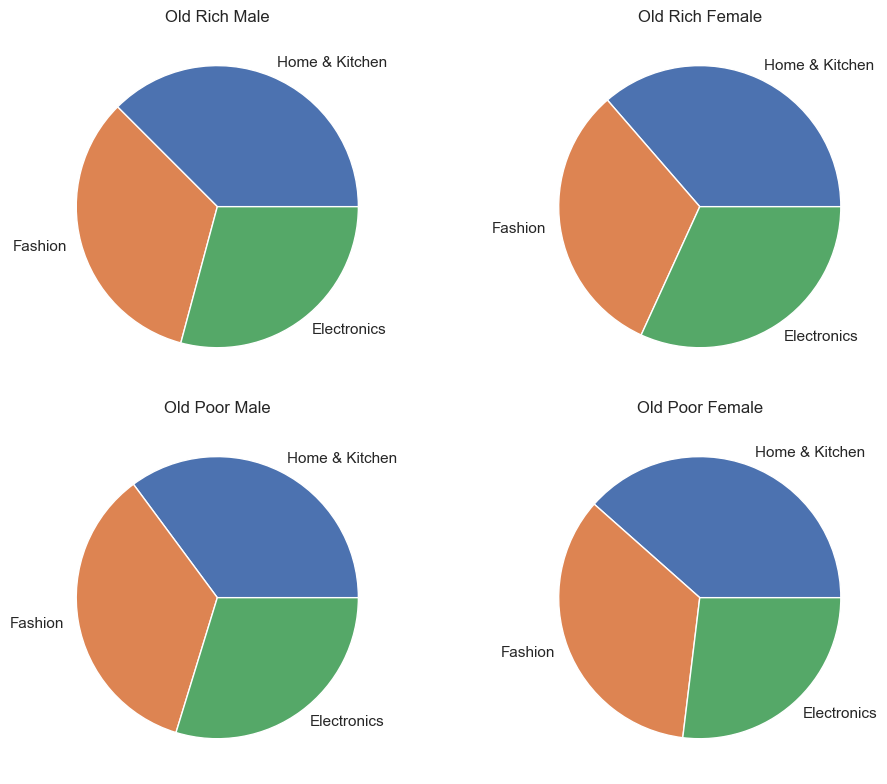

In [90]:
#Create the labels for the pie chart
labels_customer = ['Old Rich Male', 'Old Rich Female','Old Poor Male', 'Old Poor Female']
fig,axs = plt.subplots(2,2, figsize = (10,8))

labels_category = ['Home & Kitchen', 'Fashion', 'Electronics']

# Plot box plots for each category
old_male_category_count.plot(ax=axs[0, 0], kind='pie', title=labels_customer[0], labels=labels_category, ylabel='')
old_rich_female_category_count.plot(ax=axs[0, 1], kind='pie', title=labels_customer[1],labels=labels_category,ylabel='')
old_poor_male_category_count.plot(ax=axs[1, 0], kind='pie', title=labels_customer[2],labels=labels_category,ylabel='')
old_poor_female_category_count.plot(ax=axs[1, 1], kind='pie', title=labels_customer[3],labels=labels_category,ylabel='')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The spread is equal amonst all sepearation of customer types

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_male_df['Group'] = 'Old, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_female_df['Group'] = 'Old, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

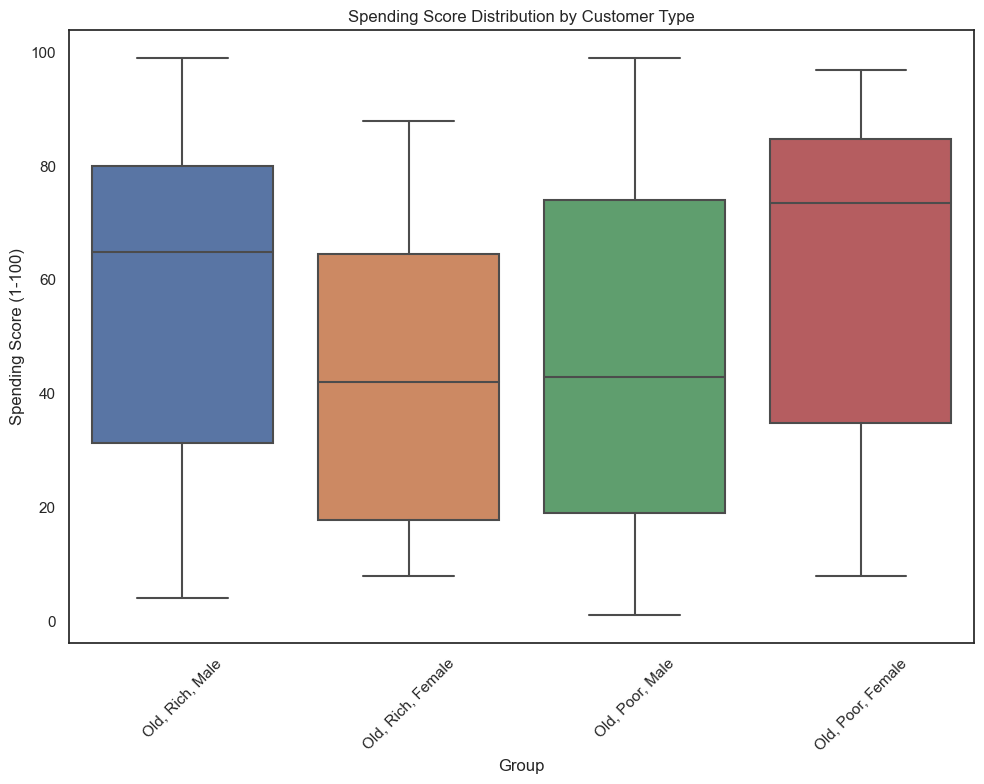

In [91]:
import seaborn as sns
import pandas as pd

# Combine dataframes and add a 'Group' column to differentiate between groups
old_rich_male_df['Group'] = 'Old, Rich, Male'
old_rich_female_df['Group'] = 'Old, Rich, Female'
old_poor_male_df['Group'] = 'Old, Poor, Male'
old_poor_female_df['Group'] = 'Old, Poor, Female'

# Concatenate the dataframes
combined_df = pd.concat([old_rich_male_df, old_rich_female_df, old_poor_male_df, old_poor_female_df])

# Plot box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=combined_df, x='Group', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Customer Type')
plt.xlabel('Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


This highlights that old, poor, females have a higher spending score than the other groups. Its median is above the top 25% of customers in the other 3 groups. This suggests that old, poor, females have a higher amount of spending than the other groups. Young, rich men also have a higher median of spending compared to old rich females and old poor males. So those two groups are good target groups when looking to advertise products

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/3074892846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_male_df['Category'] = 'Old, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/3074892846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_female_df['Category'] = 'Old, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/3074892846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

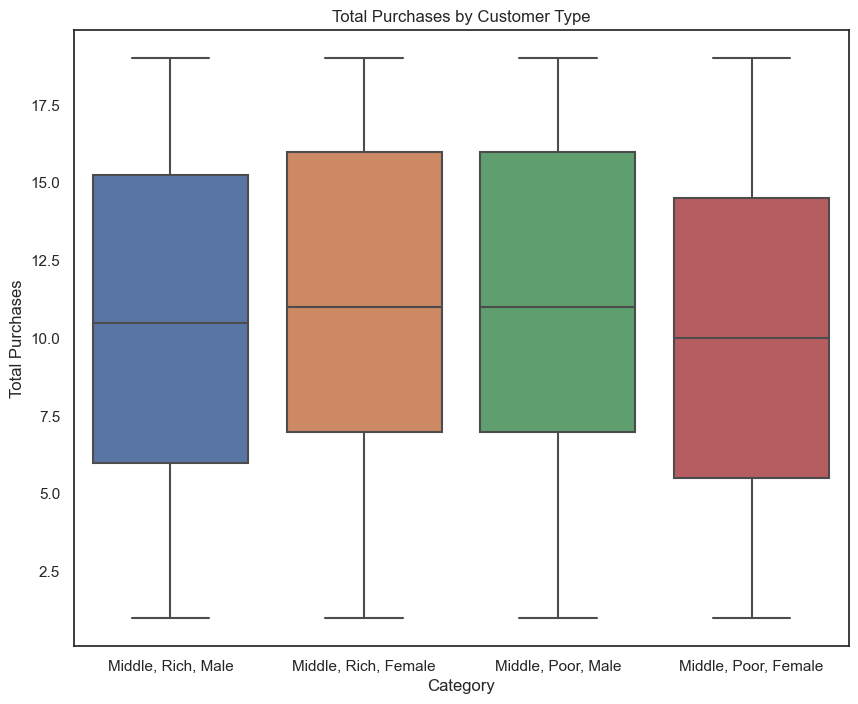

In [92]:
# Concatenate dataframes
old_rich_male_df['Category'] = 'Old, Rich, Male'
old_rich_female_df['Category'] = 'Old, Rich, Female'
old_poor_male_df['Category'] = 'Old, Poor, Male'
old_poor_female_df['Category'] = 'Old, Poor, Female'

combined_df = pd.concat([middle_rich_male_df, middle_rich_female_df, middle_poor_male_df, middle_poor_female_df])

# Create box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Category', y='Total Purchases', data=combined_df)
plt.title('Total Purchases by Customer Type')
plt.show()


Total purchases remains constant amonst older customers

## 3. Predicting Customer Behavior
- Imagine you have the ability to foresee whether a customer will make a purchase soon. How would you approach this challenge using the information available in your dataset?
- Discuss how accurately predicting customer purchases could benefit the business. What strategies could be implemented to capitalize on these predictions?

As there is no response variable within your data you cannot do traditional supervised learing tasks. These include regression or classification. You are going to have to use unsupervised learning techniques. The best way to make the prediction of whether someone will make a purchase soon is using clustering. 

Using clustering you are able to group certain customers together. By looking at the total purchases in one time period compared to the next through updating the database you are able to determine which cluster of customers are making purchases. You would be able to look at the purchased recently and look at the variables that are present to determine whether there was a correlation there. 

Through observing how total purchases changes over time with the clusters and customer types that are present from the parameters in the customer base you are able to eventually gain a greater understanding into whether you can foresee whether a customer will make a purchase soon.

In [93]:
df['Gender Numerical'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently,Category Most Purchased Numerical,Income Category,Gender Numerical
CustomerID,,,,,,,,,,
1,56,134,36,Female,10,Home & Kitchen,1,1,Rich,1
2,69,34,97,Female,13,Fashion,1,2,Poor,1
3,46,138,36,Male,19,Electronics,1,3,Rich,0
4,32,47,3,Male,11,Electronics,1,3,Poor,0
5,60,58,73,Male,13,Home & Kitchen,0,1,Poor,0
...,...,...,...,...,...,...,...,...,...,...
996,60,87,30,Male,12,Home & Kitchen,0,1,Average,0
997,64,121,12,Female,17,Home & Kitchen,1,1,Rich,1
998,62,61,35,Female,5,Electronics,0,3,Average,1


In [94]:
df['Category Most Purchased Numerical'] = df['Category Most Purchased'].map({'Home & Kitchen':1,'Fashion':2,'Electronics':3})
df.to_csv('/Users/ben_nicholson/Visual_Code_Projects/Advanced Data Science/Project 2/updated_ecommerce.csv')
df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently,Category Most Purchased Numerical,Income Category,Gender Numerical
CustomerID,,,,,,,,,,
1,56,134,36,Female,10,Home & Kitchen,1,1,Rich,1
2,69,34,97,Female,13,Fashion,1,2,Poor,1
3,46,138,36,Male,19,Electronics,1,3,Rich,0
4,32,47,3,Male,11,Electronics,1,3,Poor,0
5,60,58,73,Male,13,Home & Kitchen,0,1,Poor,0
...,...,...,...,...,...,...,...,...,...,...
996,60,87,30,Male,12,Home & Kitchen,0,1,Average,0
997,64,121,12,Female,17,Home & Kitchen,1,1,Rich,1
998,62,61,35,Female,5,Electronics,0,3,Average,1


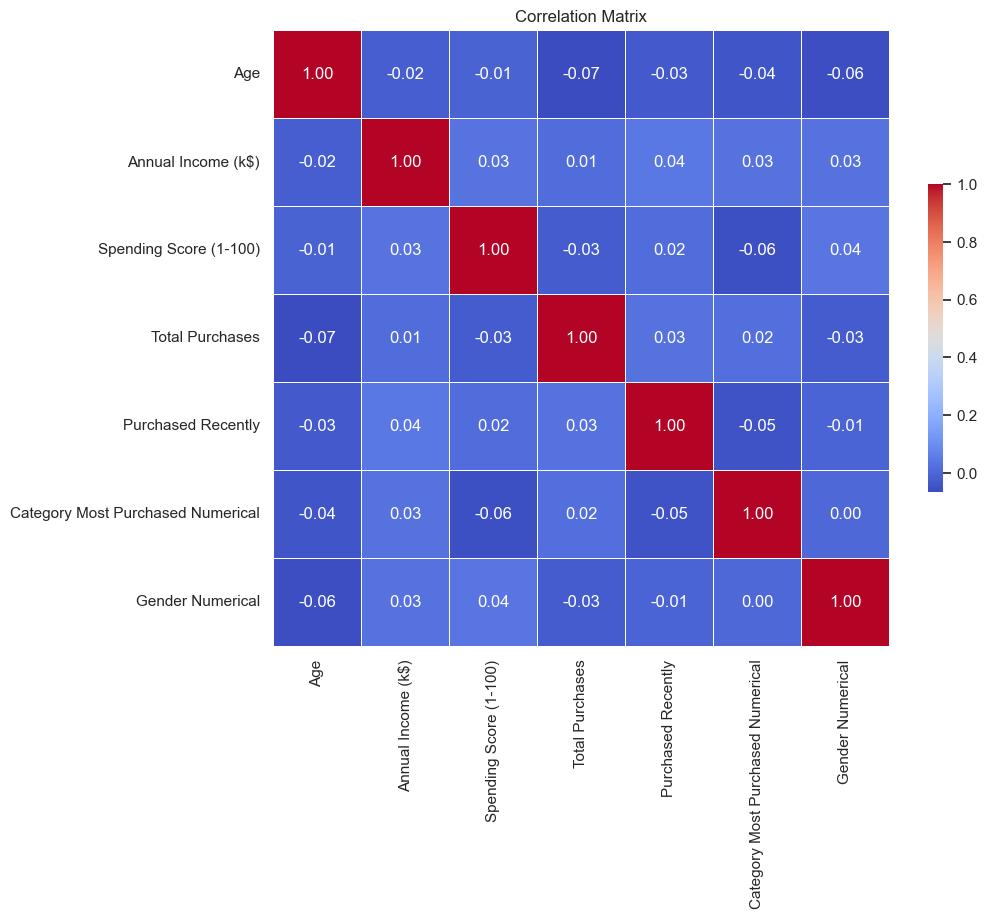

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap showing all values
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()


The correlation matrix does a good job at indicating the relationship between particular variables. There is clearly no association between any of the variables. The reason why clustering is important as well as the correlation matrix is that clustering can take into account multiple variables.

## 4. Enchancing Marketing Strategies 
- Based on your analysis, propose targeted marketing strategies for engaging different types of customers. How can personalized marketing improve customer satisfaction and sales?
- Reflect on the role of customer insights in shaping marketing campaigns. How can the findings from your analysis inform future marketing efforts?

With the few insights that were made during this investigation, the benefit of targeted marketing could be observed by the following.

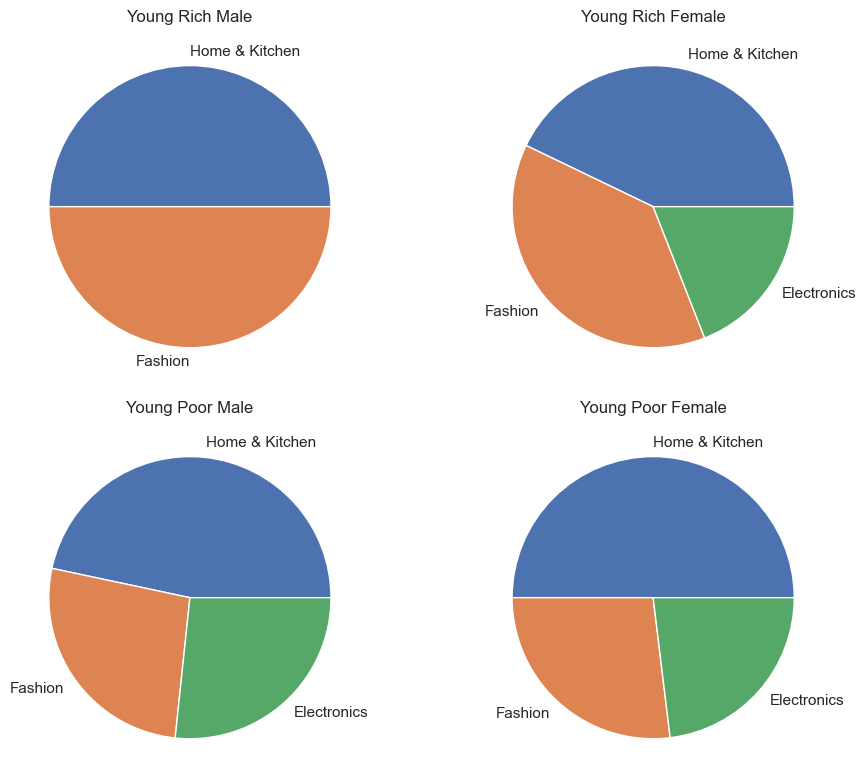

In [96]:
#Create the labels for the pie chart
labels_customer = ['Young Rich Male', 'Young Rich Female','Young Poor Male', 'Young Poor Female']
fig,axs = plt.subplots(2,2, figsize = (10,8))

labels_category = ['Home & Kitchen', 'Fashion', 'Electronics']

# Plot box plots for each category
young_rich_male_category_count.plot(ax=axs[0, 0], kind='pie', title=labels_customer[0], labels=labels_category, ylabel='')
young_rich_female_category_count.plot(ax=axs[0, 1], kind='pie', title=labels_customer[1],labels=labels_category,ylabel='')
young_poor_male_category_count.plot(ax=axs[1, 0], kind='pie', title=labels_customer[2],labels=labels_category,ylabel='')
young_poor_female_category_count.plot(ax=axs[1, 1], kind='pie', title=labels_customer[3],labels=labels_category,ylabel='')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

When looking at those in the young category (age<25) there was a higher amount of home & kitchen items purchased compared to fashion and electronics. This is where a company can use personalised marketing. You might want to send out new sales on Home & Kitchen appliances to those who are signed up to your emailing system who are younger than 25. You might also want to have younger individuals in media marketing as they are more likely to see this and want to purchase the item

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_male_df['Group'] = 'Old, Rich, Male'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_rich_female_df['Group'] = 'Old, Rich, Female'
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_35971/2524031088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

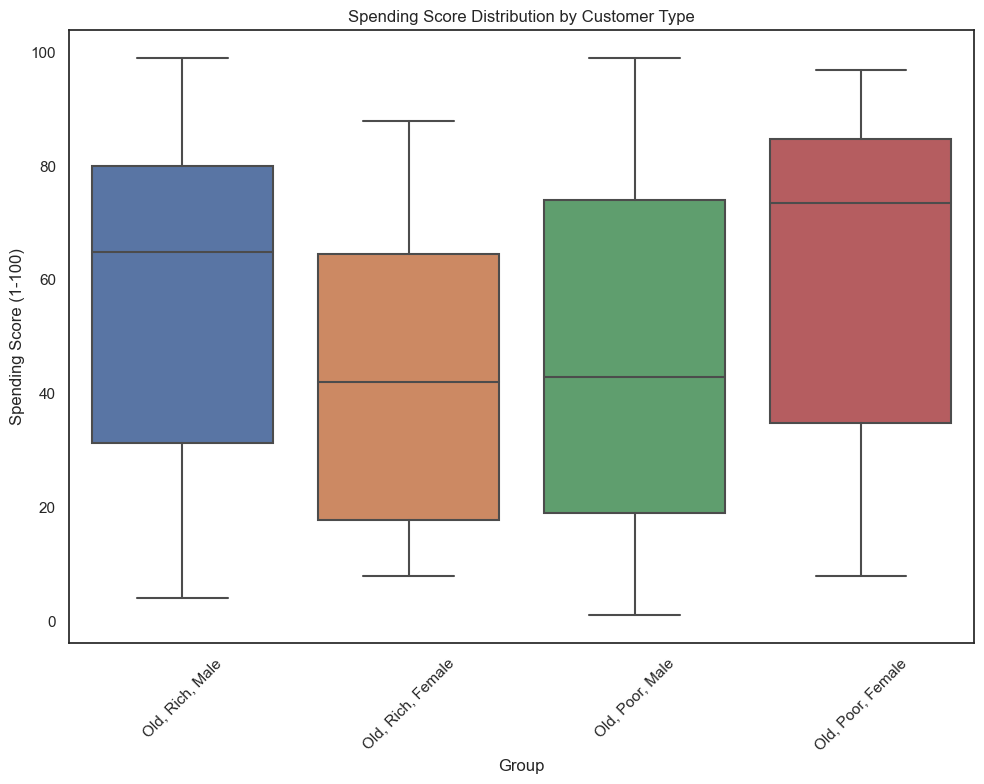

In [97]:
import seaborn as sns
import pandas as pd

# Combine dataframes and add a 'Group' column to differentiate between groups
old_rich_male_df['Group'] = 'Old, Rich, Male'
old_rich_female_df['Group'] = 'Old, Rich, Female'
old_poor_male_df['Group'] = 'Old, Poor, Male'
old_poor_female_df['Group'] = 'Old, Poor, Female'

# Concatenate the dataframes
combined_df = pd.concat([old_rich_male_df, old_rich_female_df, old_poor_male_df, old_poor_female_df])

# Plot box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=combined_df, x='Group', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Customer Type')
plt.xlabel('Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


Another example of where you can alter marketing based on the information you have gathered is in the box plots above. The spending score for old poor females was much higher compared to the other categories of individuals. This suggests that when you are marketing to older individuals it is going to be based to have products that poor females purchase more. 

Finding patterns in sales data is extremely important. If you find that certain purchases are made from individuals with certain spending habits or characteristics then you can target your marketing efforts. If you are to just look at base level statistics like the spread of age compared with number of purchases it is not going to give the same level of detail compared to looking at certain consumer types such as old poor women who in this situation had higher spending scores so marketing towards their interests is very important.

When you are in charge of marketing, looking at the small details are very important. It could be the difference between making a lot of money or not. This is one of the reasons why companies try to gain so much information from their consumers, because most of the time they fit into a category that can be extrapolated and can help increase sales. 